## **Exploratory Data Analysis on the Titanic Dataset**

This marks my inaugural kernel, where the primary objective is to perform exploratory data analysis (EDA) and statistical modeling on the Titanic Dataset. The aim is to gain insights and ultimately predict survival outcomes (0 = Not Survived, 1 = Survived). Out of the 891 passengers who embarked on the Titanic, approximately 38% survived, while the majority, 62%, did not survive the disaster.

### Outlined below is the step-by-step process I followed in executing the aforementioned procedure:

1)Import Relevant Python Libraries:
Import essential Python libraries necessary for the analysis.

2)Load Train and Test Datasets:
Load the train and test datasets and set the index if applicable.
Visual Inspection of Dataset:

3)Visually inspect the head of the dataset.
Examine the train dataset to determine tidiness, shape, data types, missing values, unique counts, and construct a data dictionary dataframe.

4)Descriptive Statistics:
Run descriptive statistics for object and numerical data types.
Transform data types accordingly based on the descriptive statistics.

5)Univariate, Bivariate, and Multivariate Analysis:
Conduct univariate, bivariate, and multivariate analysis using both graphical and numerical representations.

6)Feature Engineering:
Extract titles from names.
Create new features from name, age, fare, sibsp, parch, and cabin.

7)Preprocessing and Data Preparation:
Prepare data for statistical modeling through preprocessing steps.

8)Statistical Modeling:
### Apply statistical modeling techniques to derive meaningful insights and predictions.

This structured approach aims to unravel patterns, relationships, and hidden information within the Titanic dataset, providing a foundation for subsequent modeling and analysis.







## **1)Import the python libraries relevant in doing the EDA process**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

## **2)Loading the Train dataset into the google colab.**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving titanictrain.csv to titanictrain.csv


In [ ]:
import pandas as pd

# Assuming the uploaded file is named 'titanictrain.csv'
train = pd.read_csv('titanictrain.csv')


In [ ]:
#inspect the train dataset
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **3)Visually examine the initial rows of the dataset, assess its tidiness, observe the dataset's shape, inspect data types, evaluate the presence of missing values, analyze unique counts, and establish a framework for a data dictionary.**

In [ ]:
# calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns in the data set
train.shape

(891, 12)

In [ ]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [ ]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train.nunique()
datadict


,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [ ]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [ ]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## **4) Compute descriptive statistics for both object and numerical data types, and subsequently, adjust or transform the data types accordingly based on the analysis results.**






In [ ]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **5)Univariate and multivariate analysis using graphical and non-graphical method**

In [ ]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### This specifies that only 38% of the passengers survived ie,62% of the passengers didnt survive the disaster.

## **Univariate Analysis**

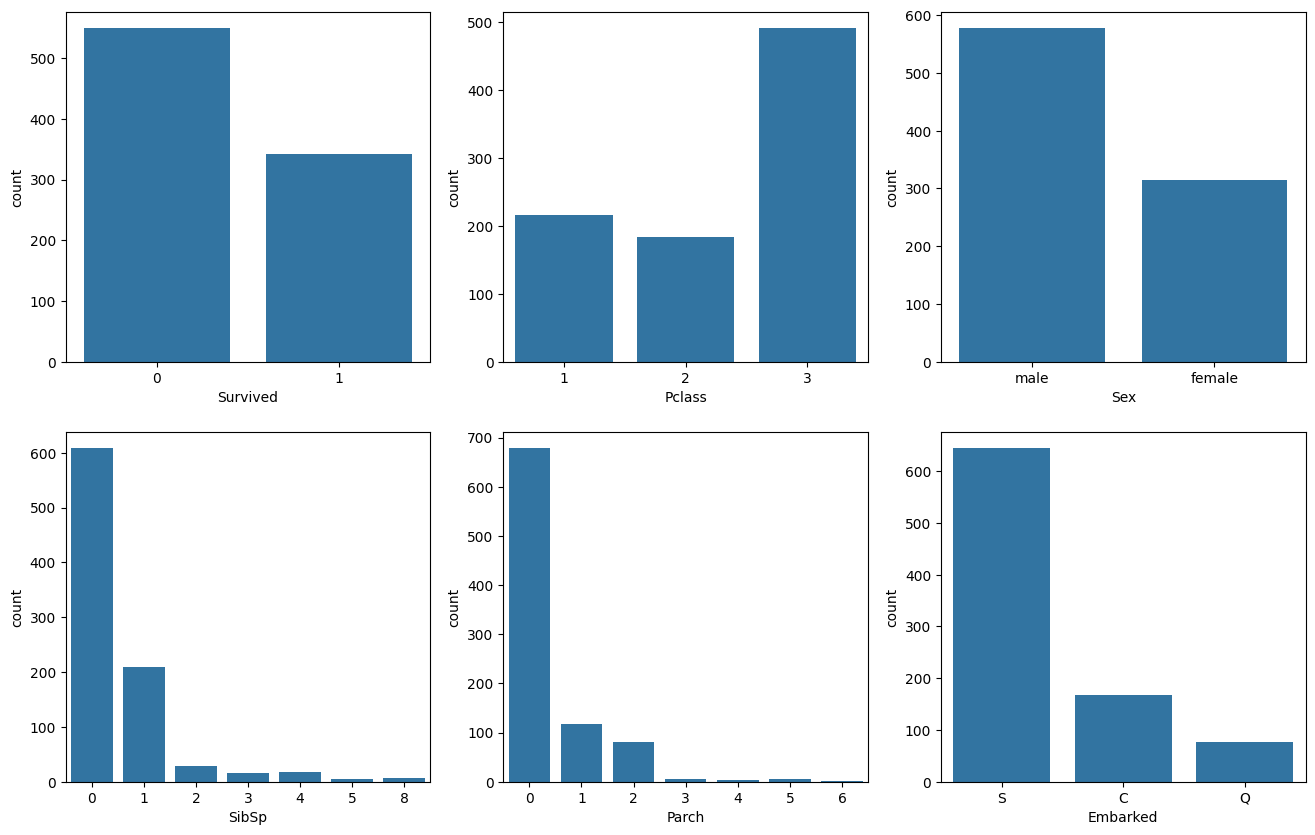

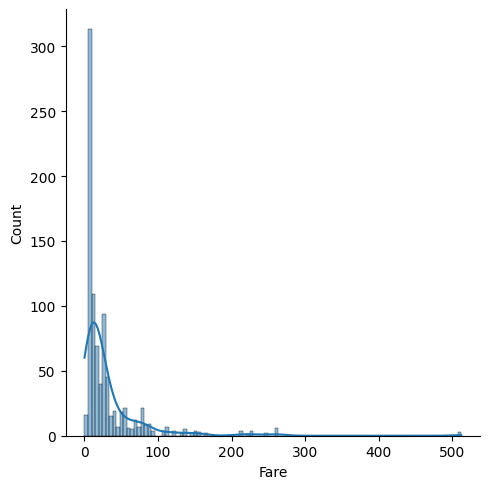

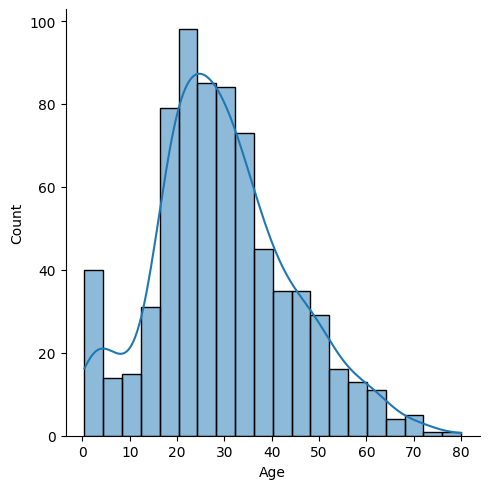

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot(x='Survived', data=train, ax=axes[0, 0])
sns.countplot(x='Pclass',data=train,ax=axes[0,1])
sns.countplot(x='Sex',data=train,ax=axes[0,2])
sns.countplot(x='SibSp',data=train,ax=axes[1,0])
sns.countplot(x='Parch',data=train,ax=axes[1,1])
sns.countplot(x='Embarked',data=train,ax=axes[1,2])
sns.displot(train['Fare'], kde=True)
sns.displot(train['Age'].dropna(),kde=True)




### **BIVARIATE EDA**

<Axes: xlabel='Survived', ylabel='Fare'>

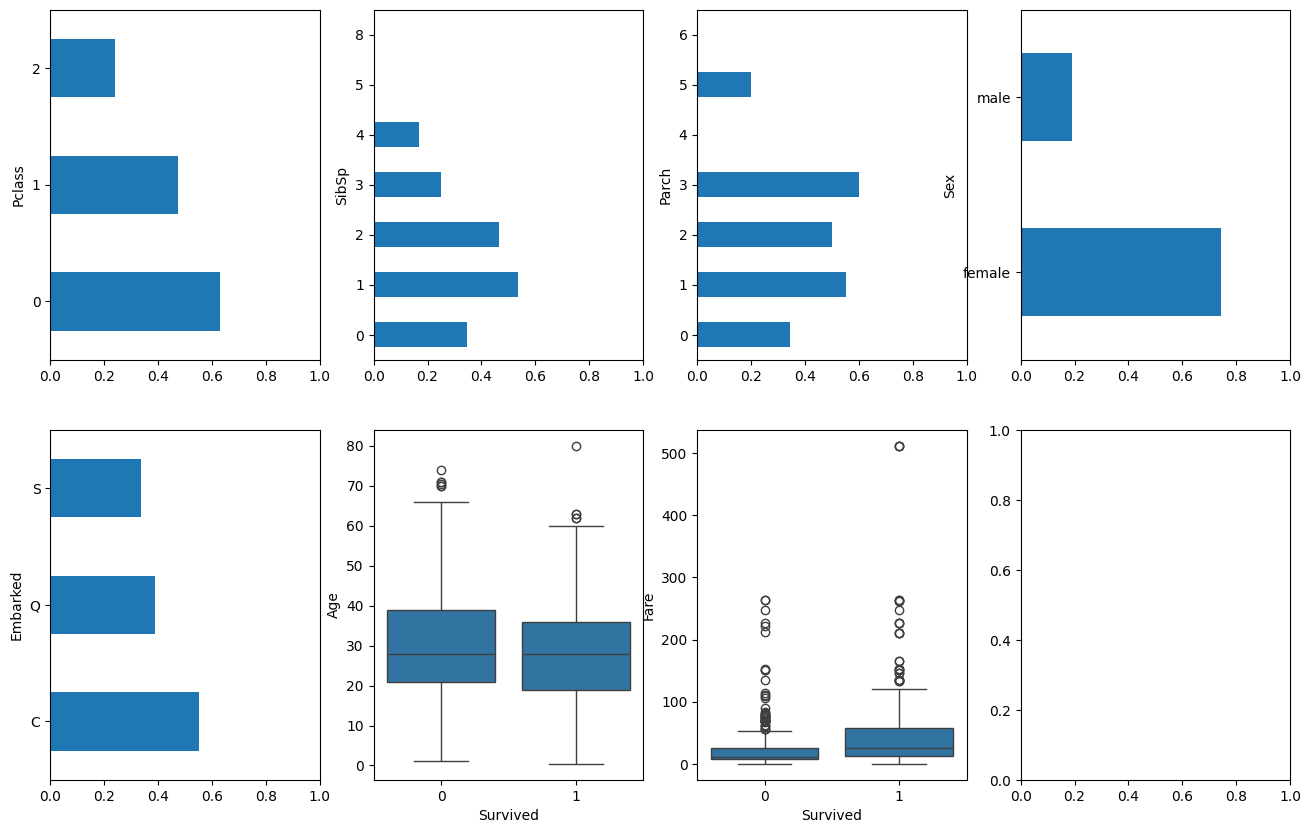

In [ ]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train['Survived'] = pd.to_numeric(train['Survived'])
train.groupby('Pclass')['Survived'].mean().plot(kind='barh', ax=axesbi[0, 0], xlim=[0, 1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

### **JOIN PLOTS**

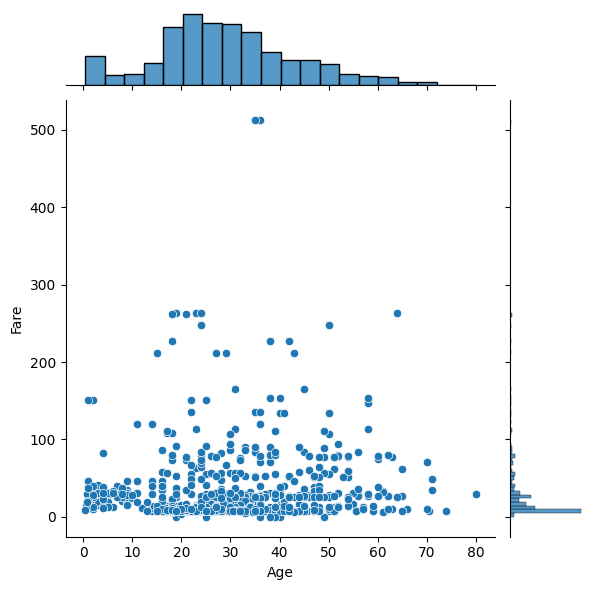

In [ ]:
sns.jointplot(x="Age", y="Fare", data=train);

# **Multi variate EDA**

### constructing a correlation matrix

<Axes: >

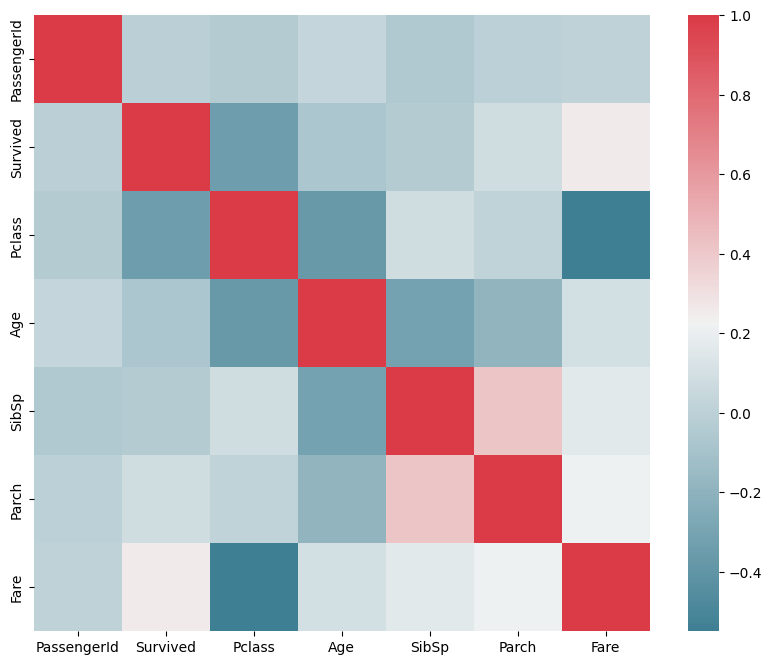

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)

sns.heatmap(corr,
            mask=mask,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

- There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

- There is a negative coorelation between Fare and Pclass, Age and Plcass

## **6. Feature Engineering Data- Extract title from name, Extract new features from the other features**

#### *New Features*

In [ ]:
train['Name_len']=train.Name.str.len()

In [ ]:
train['Ticket_First']=train.Ticket.str[0]

In [ ]:
train['FamilyCount']=train.SibSp+train.Parch

In [ ]:
train['Cabin_First']=train.Cabin.str[0]

In [ ]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [ ]:
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


## **7. Preprocessing and Prepare data for statistical modeling**

In [ ]:
# we see that there are 15 Zero values and its reasonbale
# to flag them as missing values since every ticket
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [ ]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [ ]:
#validate to see if there are no more zero values
print((train.Fare == 0).sum())


0


In [ ]:
# keep the index
train[train.Fare.isnull()].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [ ]:
train.Fare.mean()

32.75564988584475

Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed

Imputation involves employing a model to substitute for absent values. Various alternatives exist for replacing missing values, including:

Employing a constant value with significance in the domain, like 0, distinct from all other values.
Selecting a value from another randomly chosen record.
Utilizing the mean, median, or mode value for the respective column.
Employing a value predicted by another predictive model.

In [ ]:
# impute the missing Fare values with the mean Fare value
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [ ]:
# validate if any null values are present after the imputation
train[train.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title




###  b. Input Missing or Zero values to the  Age variable

In [ ]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())

0


In [ ]:
# validate if any null values are present after the imputation
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
5,6,0,2,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,16,3,0,NaN,Mr.
17,18,1,1,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28,2,0,NaN,Mr.
19,20,1,2,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,23,2,0,NaN,Mrs.
26,27,0,2,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,23,2,0,NaN,Mr.
28,29,1,2,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29,3,0,NaN,Miss.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,2,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,16,2,0,NaN,Mr.
863,864,0,2,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,33,C,10,NaN,Miss.
868,869,0,2,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,27,3,0,NaN,Mr.
878,879,0,2,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,18,3,0,NaN,Mr.


### Input Missing or Zero values to the Cabin variable

In [ ]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int8   
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Name_len      891 non-null    int64  
 13  Ticket_First  891 non-null    object 
 14  FamilyCount   891 non-null    int64  
 15  Cabin_First   204 non-null    object 
 16  title         890 non-null    object 
dtypes: float64(2), int64(6), int8(1), object(8)
memory usage: 112.4+ KB


### **8. Statistical Modelling**

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_len',
       'Ticket_First', 'FamilyCount', 'Cabin_First', 'title'],
      dtype='object')

In [ ]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [ ]:
# drop rows of missing values
trainML = trainML.dropna()

In [ ]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

### A single predictor model with logistic regression
we use logistic regression as the response variable is a binary classification

### Regression on survival on Age

In [ ]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.5963431786216596

The prediction accuracy is marginally better than the base line accuracy of 61.5% which we got earlier

## **Regression on survival on fare**

In [ ]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6568213783403657

The prediction accuracy got a bit better than the Age variable and much better than 61.5% base accuracy

### Regression on survive on Sex(using a Categorical Variable)

In [ ]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.7791842475386779

The gender of passenger is a strong predictor and purely predciting based on gender, the model accuracy increased to 77.9%

## **Regression on survive on PClass(using a Categorical Variable)**

In [ ]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6736990154711674

Gender of the passenger seems a strong predictor compared to the PClass of the passenger on Survival

## **Predicting Survival based on Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9957805907172996

Random forest did a good job in predicting the survival with a 97% accuracy